## **OBESITY LEVELS & LIFE STYLE**

**IMPORT LIBRARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

**IMPORT DATASET**

In [4]:
df = pd.read_csv("D:\\Downloads\\archive\ObesityDataSet_raw_and_data_sinthetic.csv")

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**DIMENSIONS OF DATA**

In [6]:
df.shape

(2111, 17)

**INFROMATION OF DATASET**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**STATISTICAL INFORMATION OF DATASET**

In [8]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


**MISSING VALUES OF DATASET**

In [9]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**DROP DUPLICATES VALUES OF DATASET**

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(2087, 17)

In [12]:
num_columns = df.columns[df.dtypes != 'object']

In [13]:
num_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [14]:
cat_columns = df.columns[df.dtypes == 'object']

In [15]:
cat_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**UNIVARIATE ANALYSIS**

<Figure size 640x480 with 0 Axes>

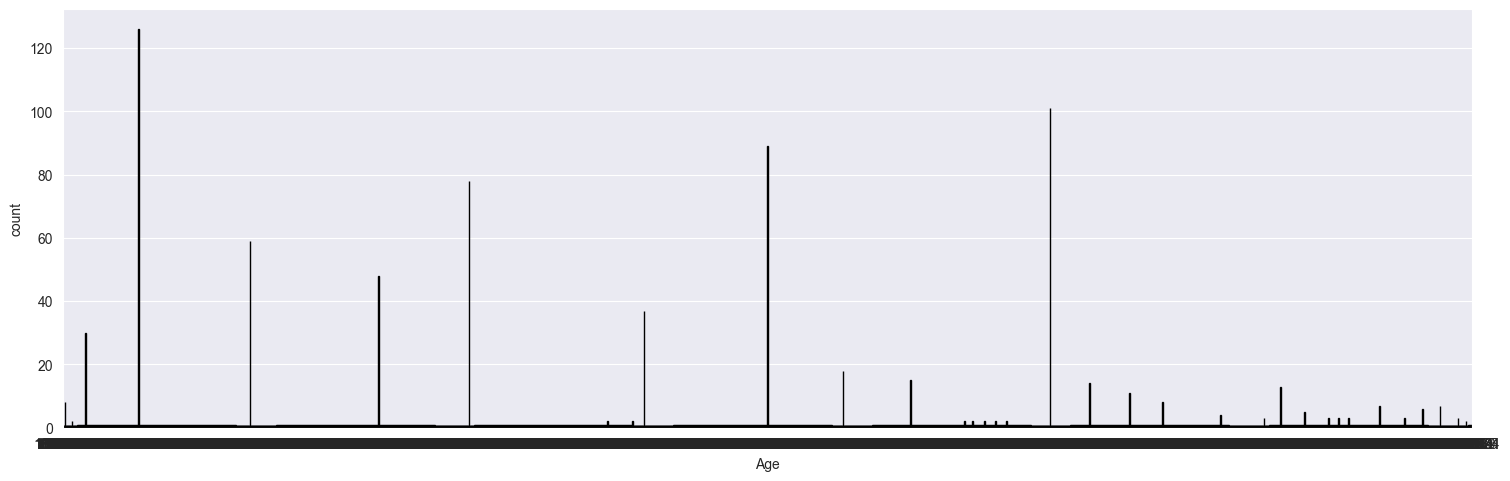

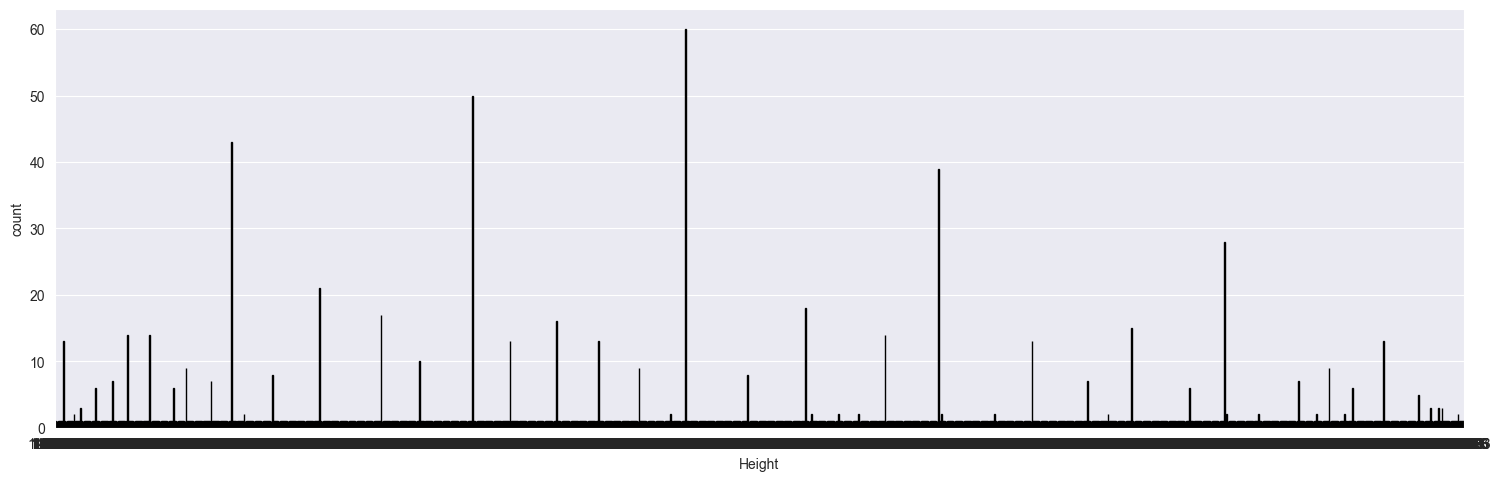

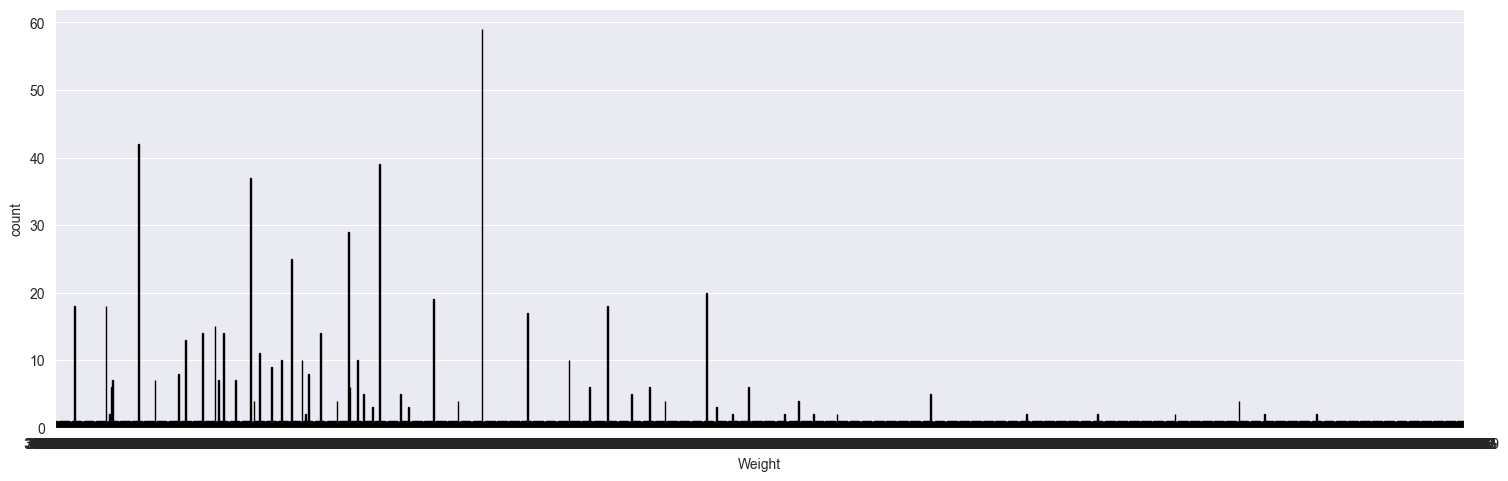

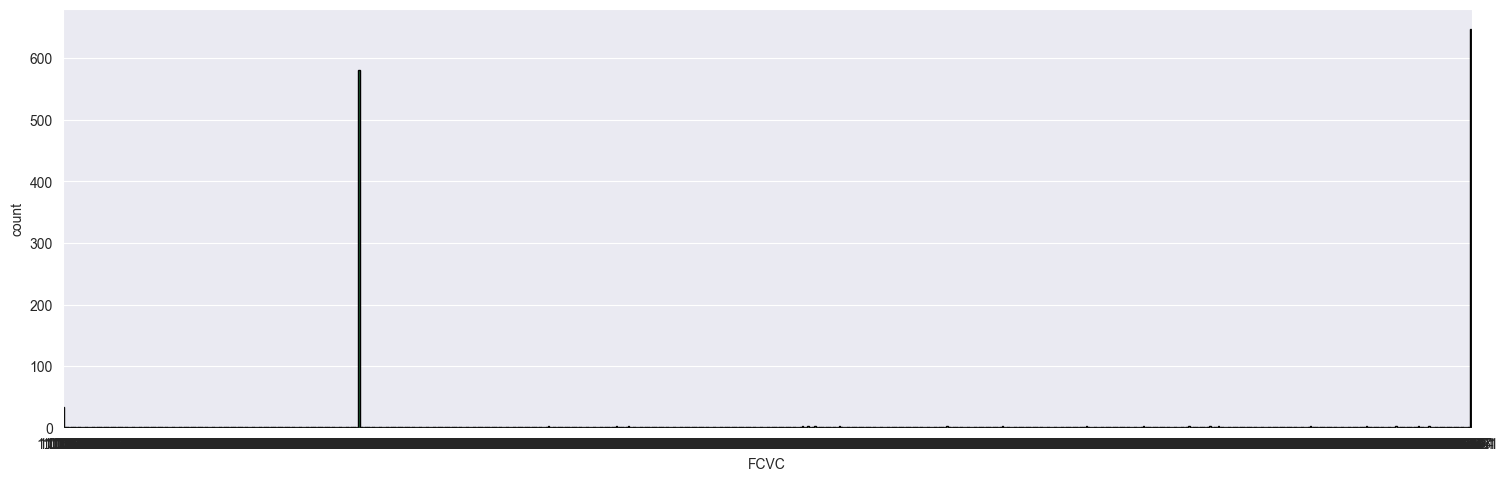

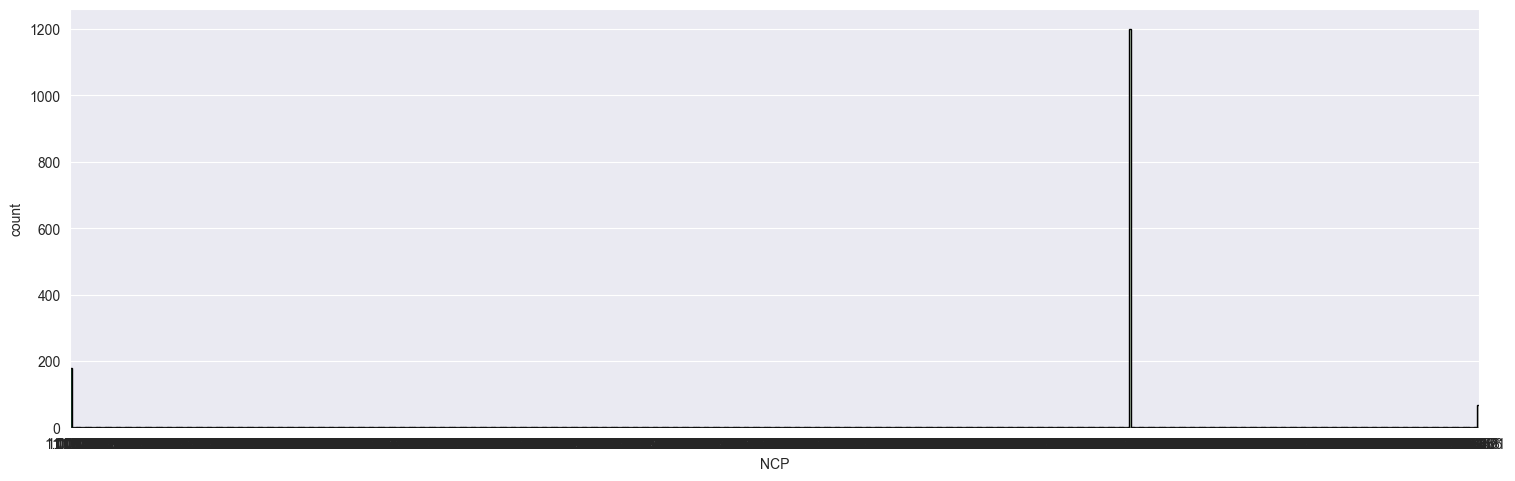

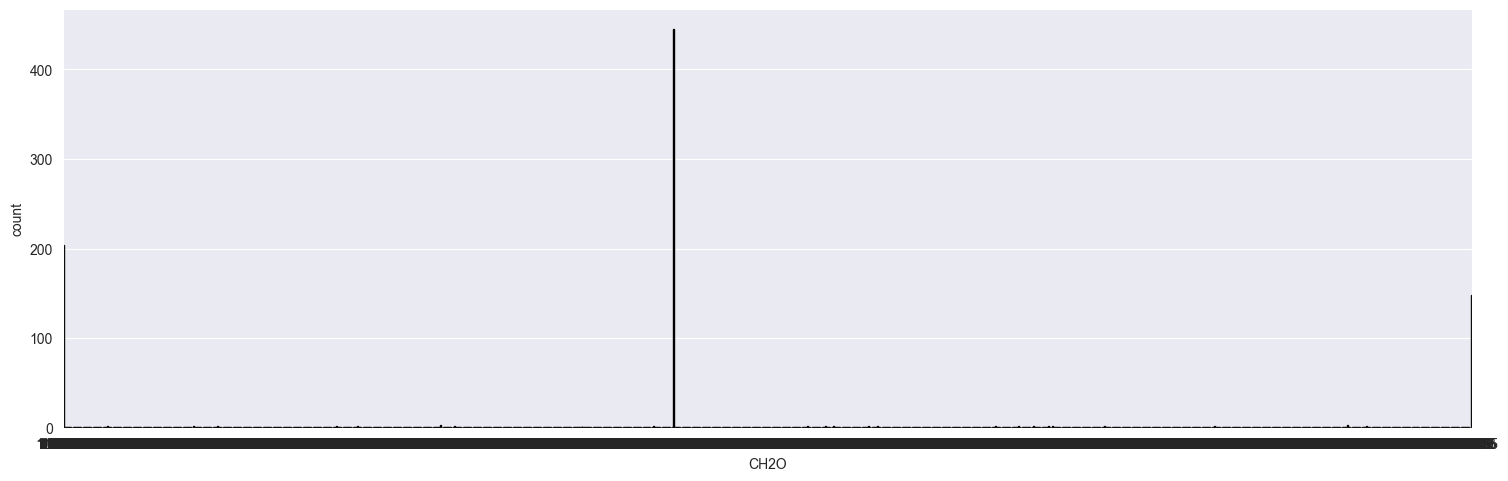

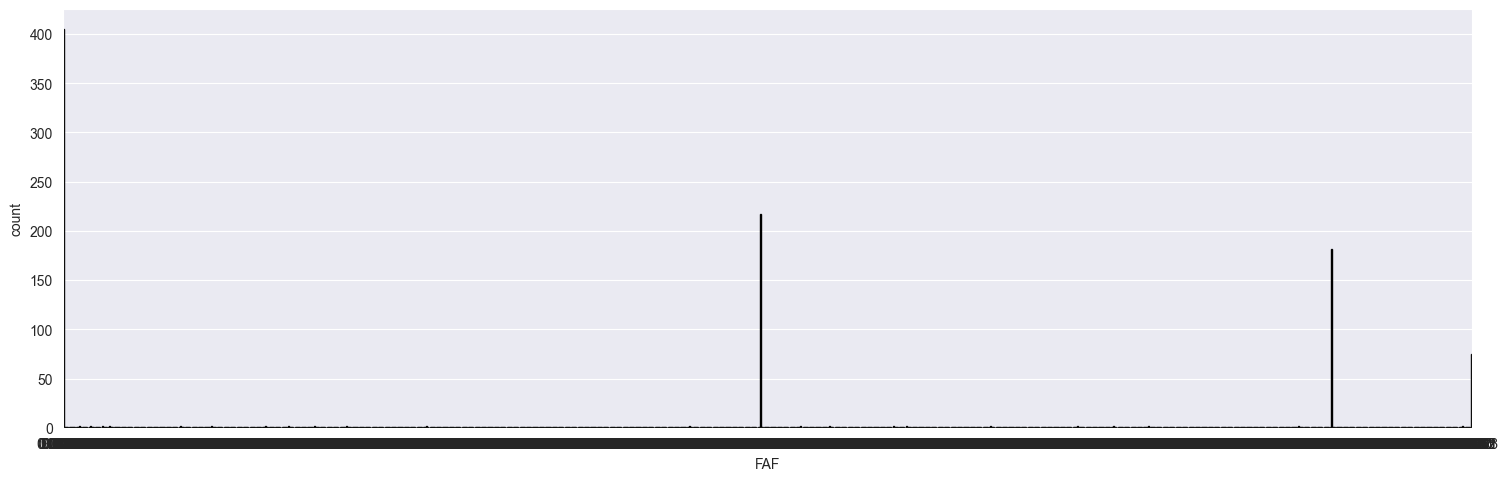

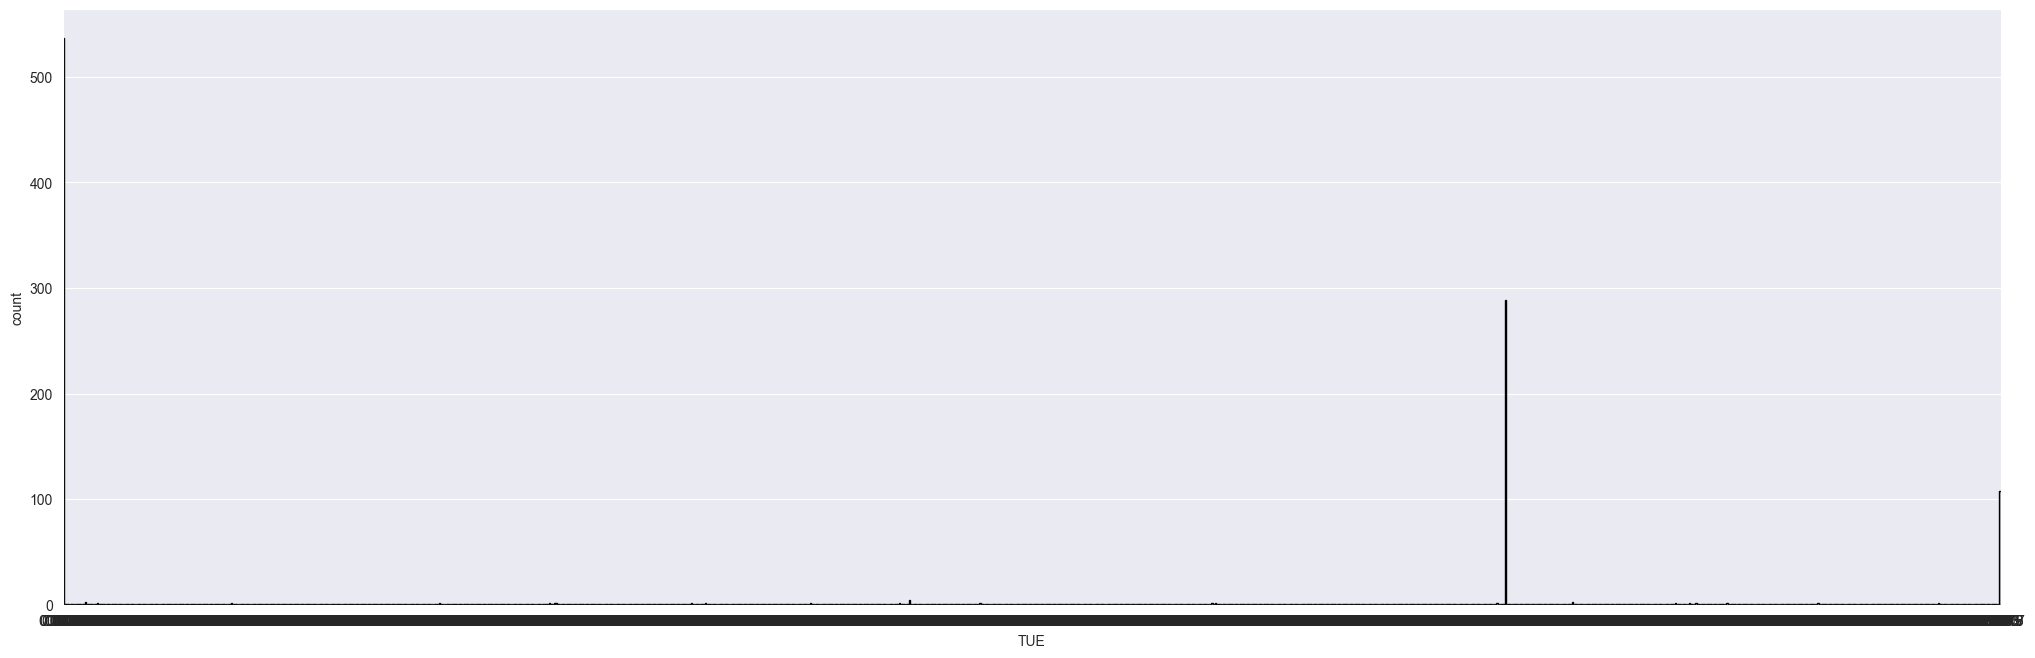

In [67]:
plt.suptitle("Countplot of Numerical Columns")

for i in range(0, len(num_columns)):
    plt.figure(figsize=(40,25))
    plt.subplot(4, 2, i+1)
    
    sns.countplot(x = num_columns[i], data = df, palette="Greens_r",edgecolor="black")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

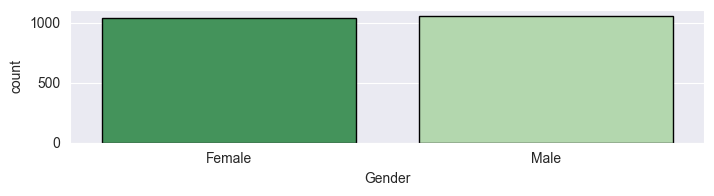

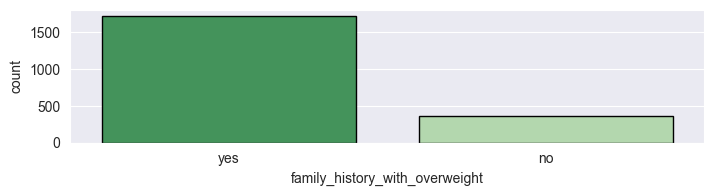

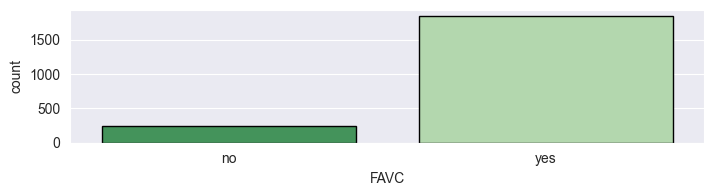

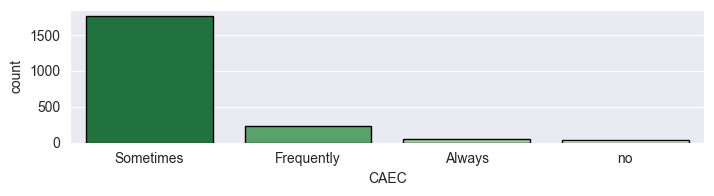

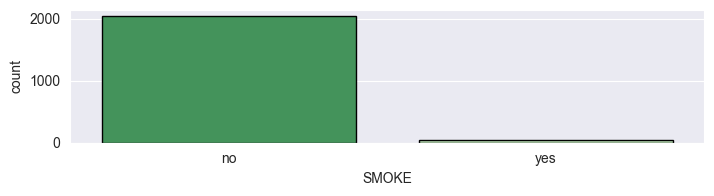

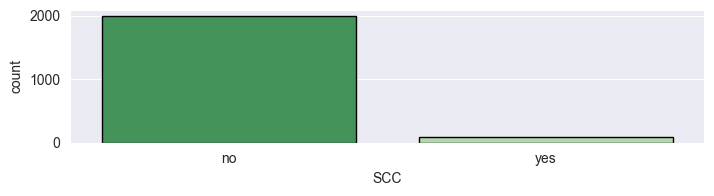

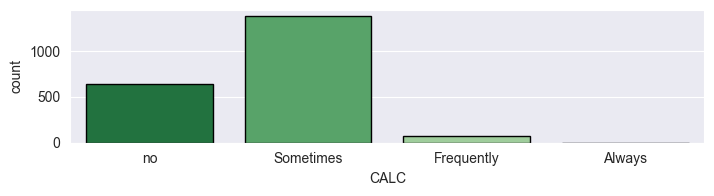

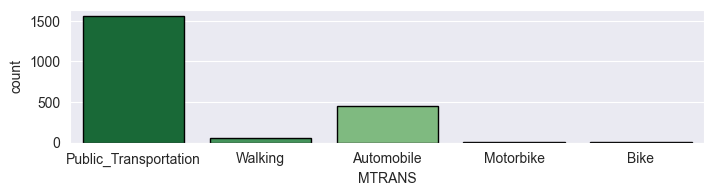

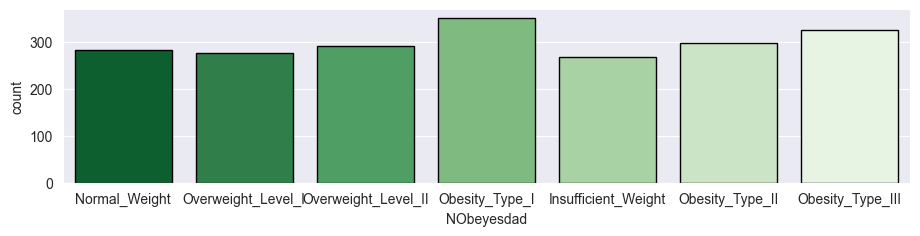

In [68]:
plt.suptitle("Countplot of Numerical Columns")

for i in range(0, len(cat_columns)):
    plt.figure(figsize=(18, 10))
    plt.subplot(5, 2, i+1)    
    ax = sns.countplot(x = cat_columns[i], data = df, palette="Greens_r",edgecolor="black")
    
plt.tight_layout()
plt.show()

**BIVARIATE ANALYSIS**

<Figure size 640x480 with 0 Axes>

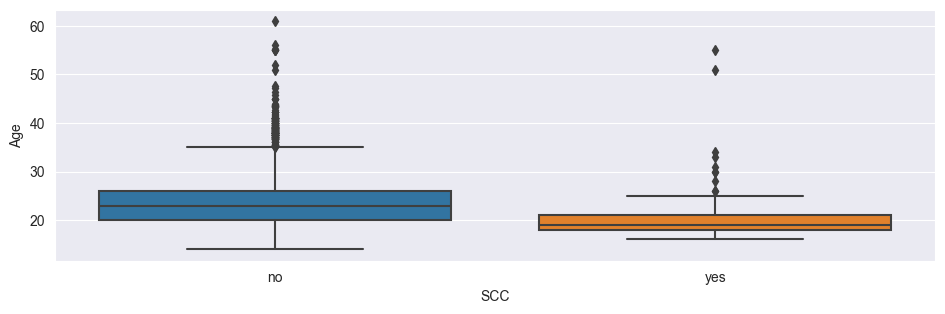

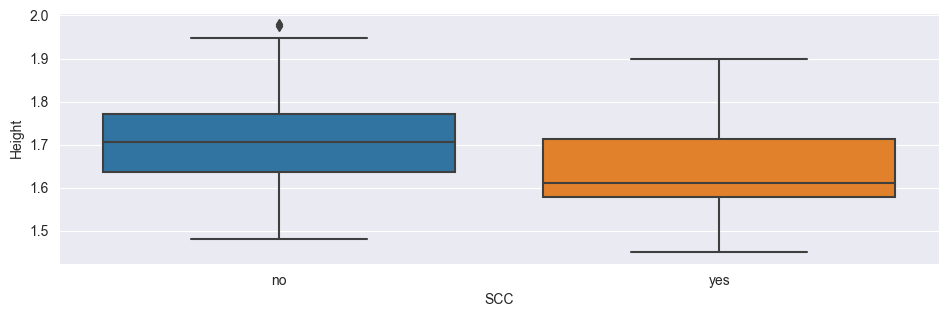

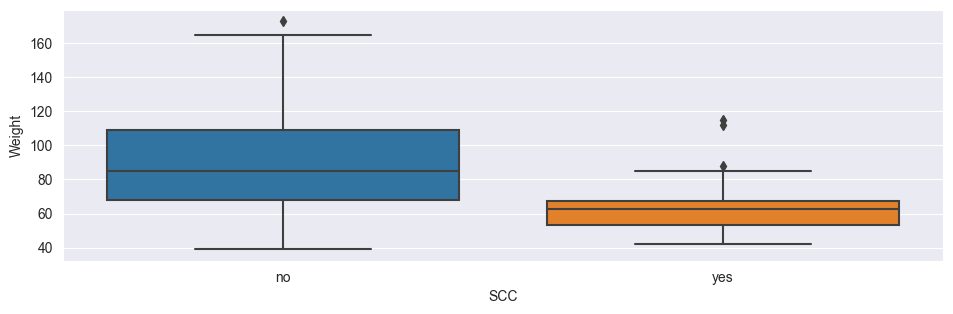

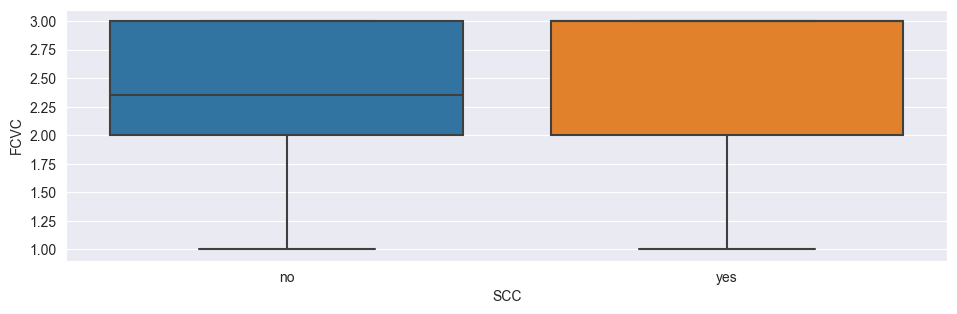

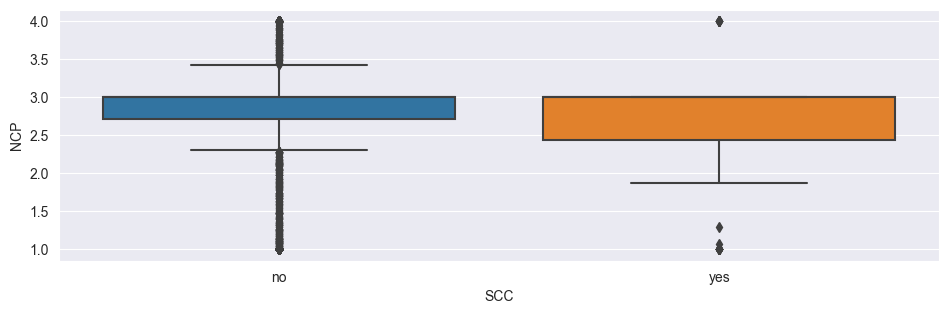

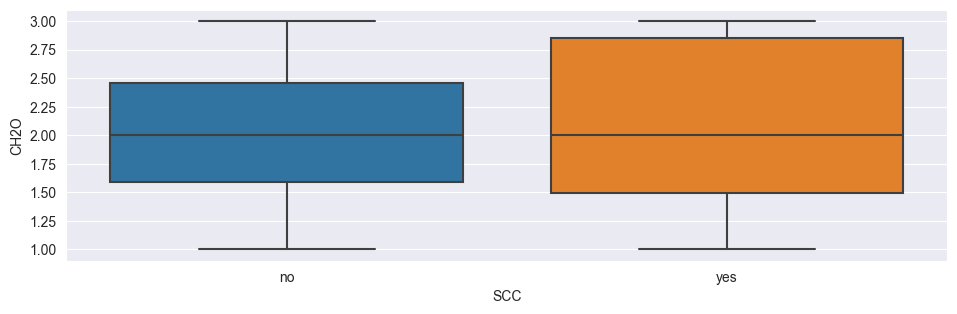

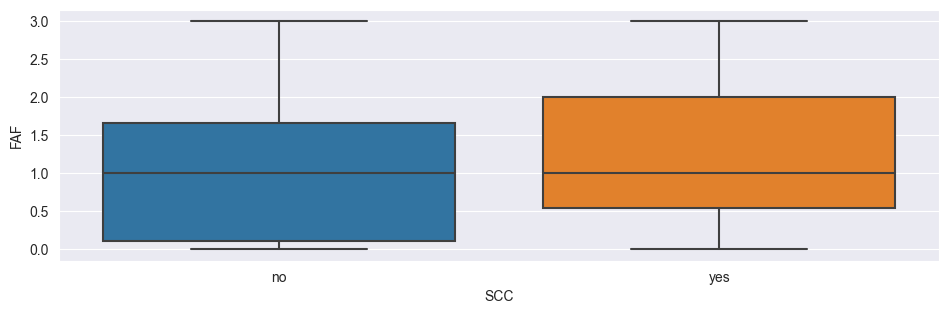

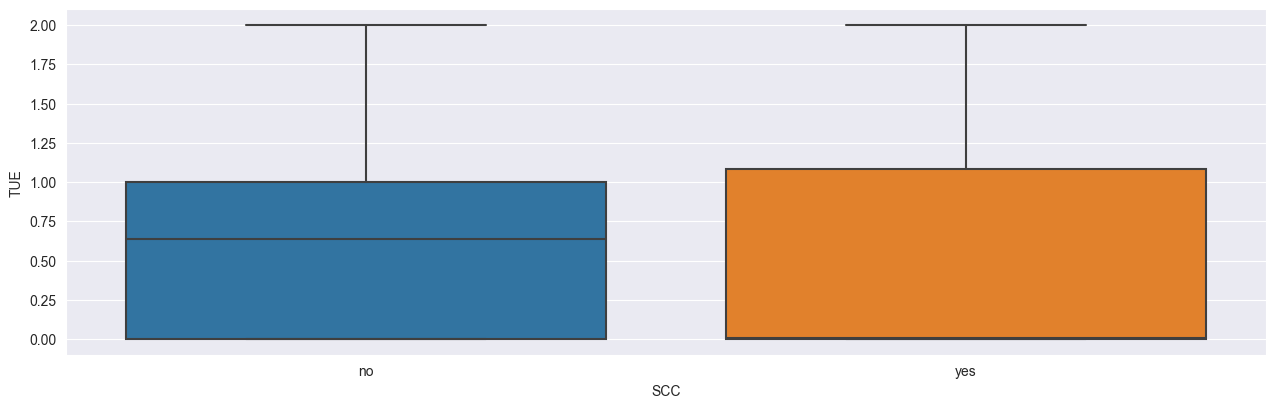

In [69]:
plt.suptitle("Boxplot of Numerical Columns")

for i in range(0, len(num_columns)):
    plt.figure(figsize=(25,15))
    plt.subplot(4, 2, i+1)
    
    sns.boxplot(y = num_columns[i], x = 'SCC', data = df)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

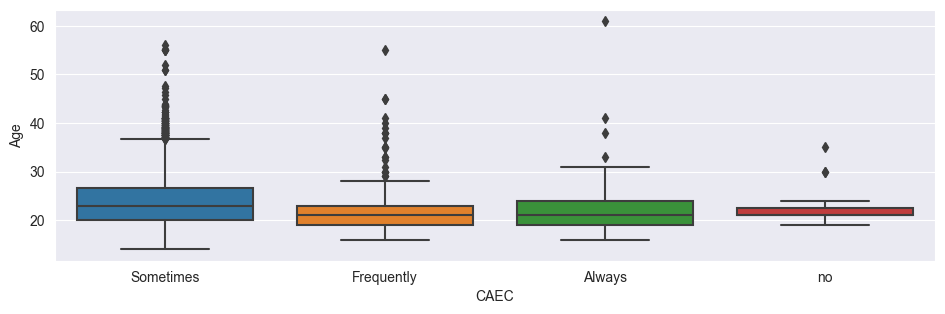

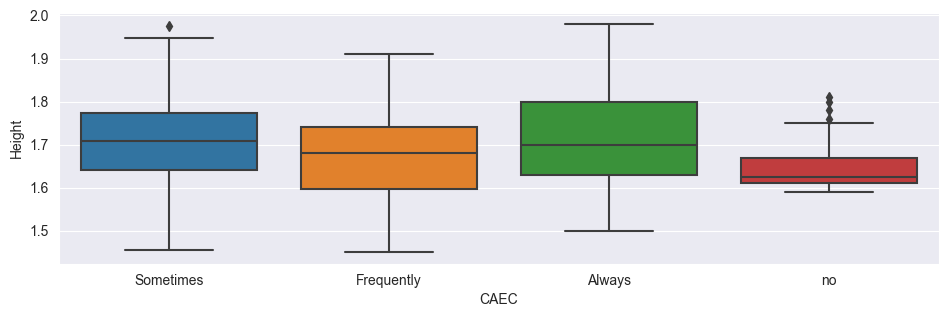

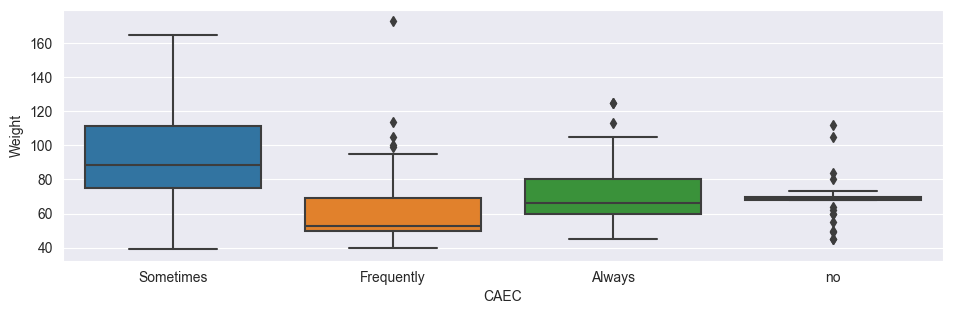

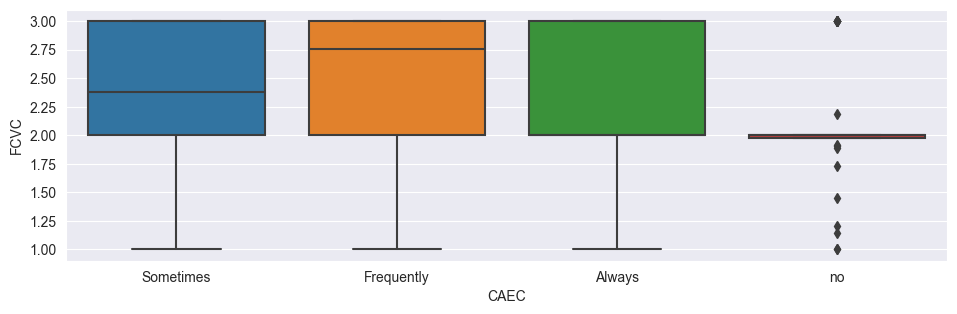

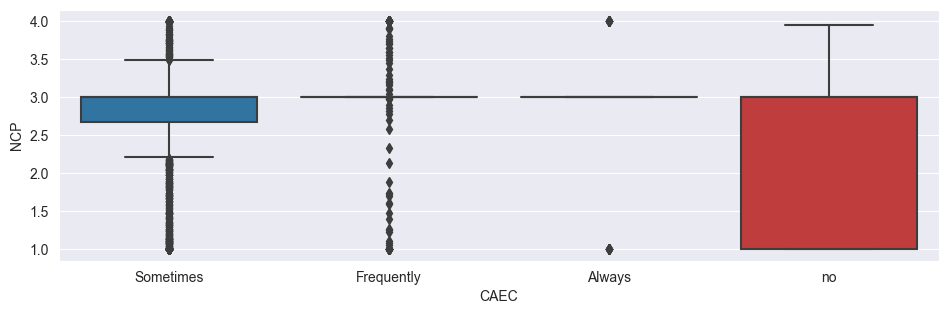

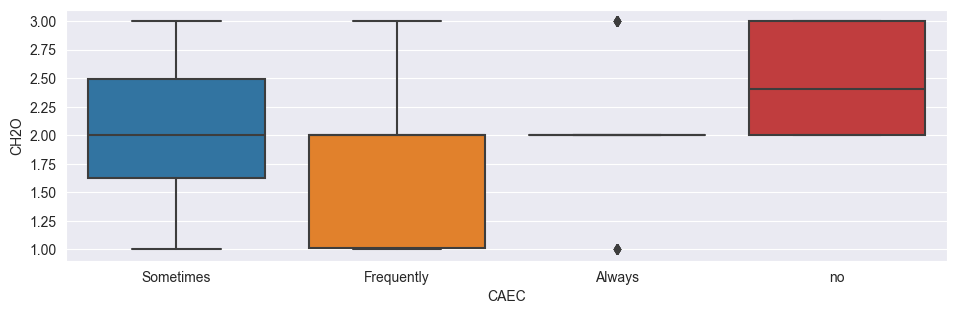

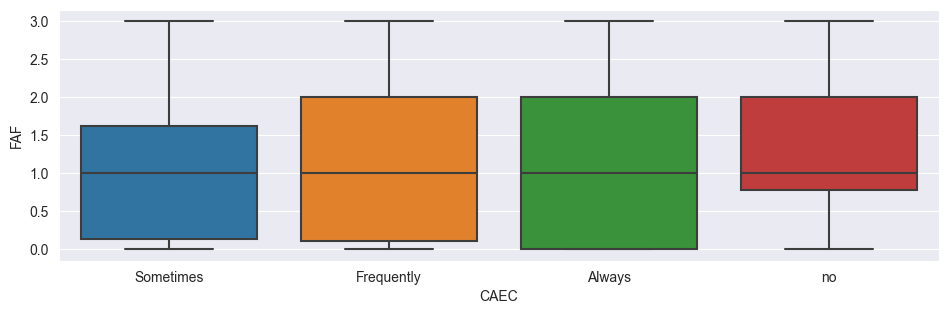

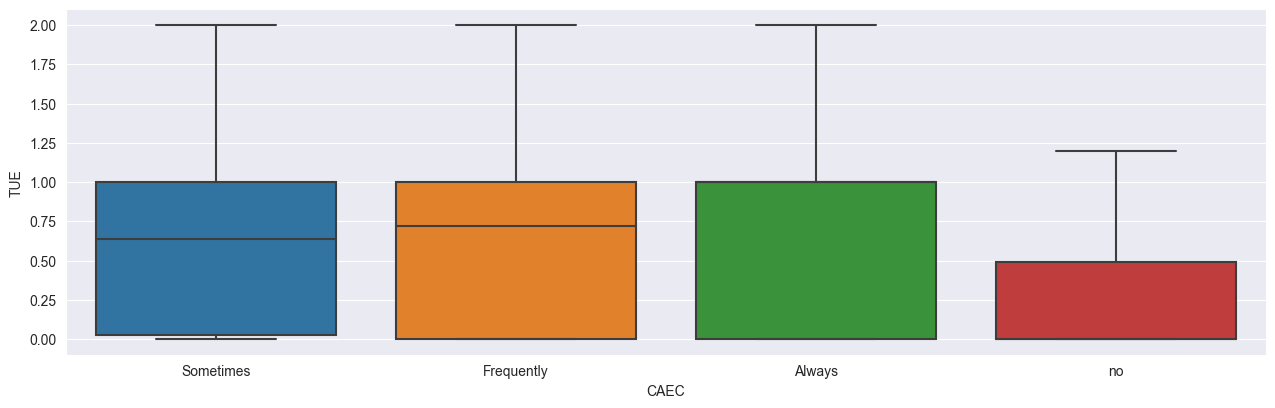

In [70]:
plt.suptitle("Boxplot of Numerical Columns")

for i in range(0, len(num_columns)):
    plt.figure(figsize=(25,15))
    plt.subplot(4, 2, i+1)
    
    sns.boxplot(y = num_columns[i], x = 'CAEC', data = df)
plt.tight_layout()
plt.show()

**Distribution**

<Figure size 640x480 with 0 Axes>

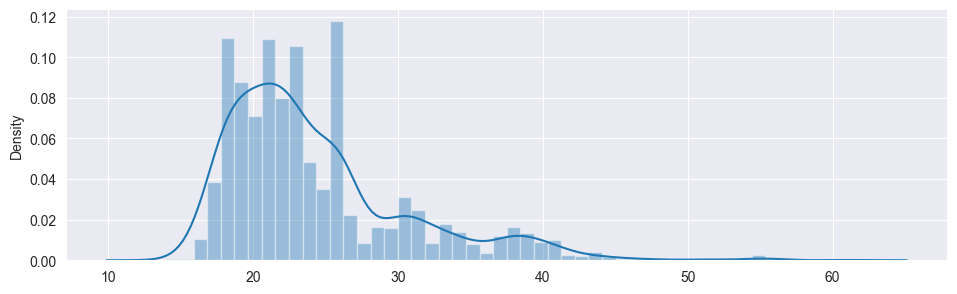

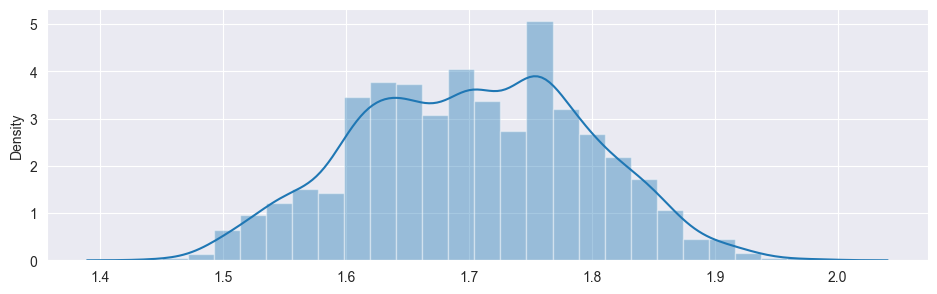

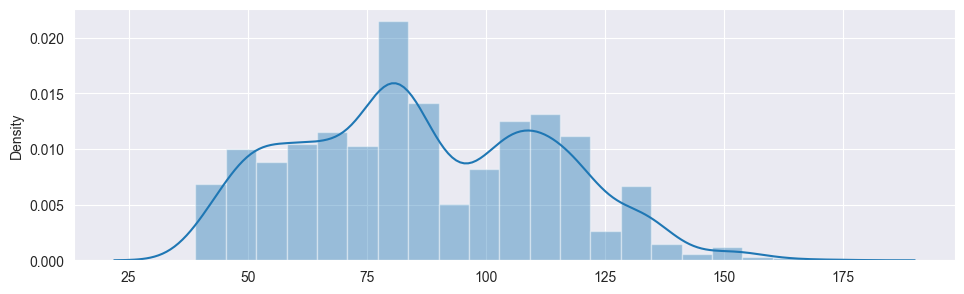

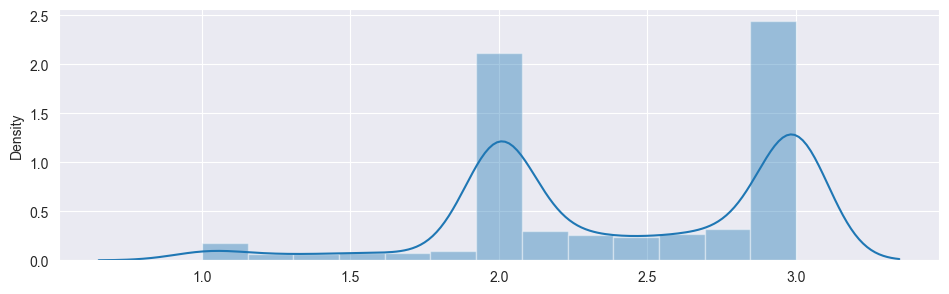

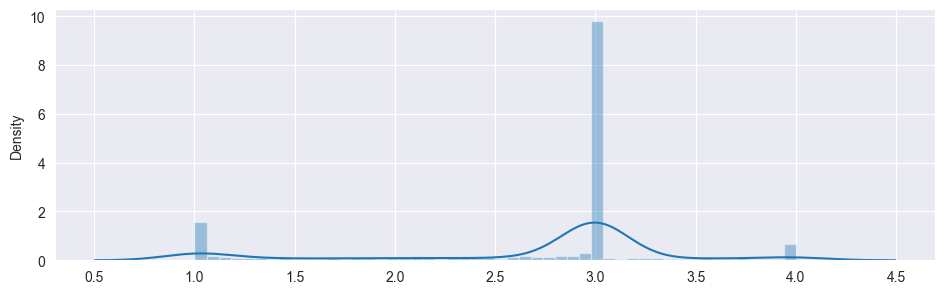

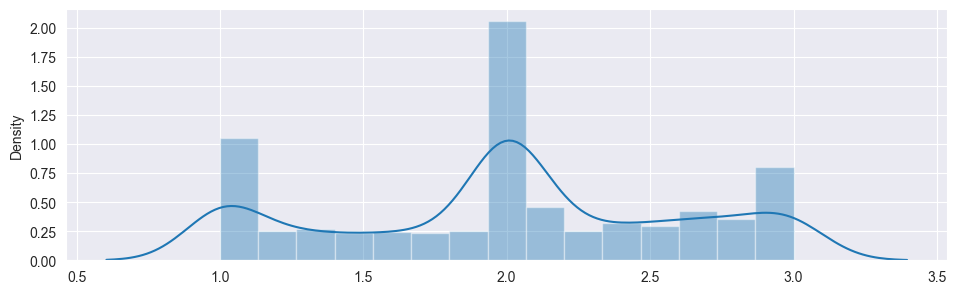

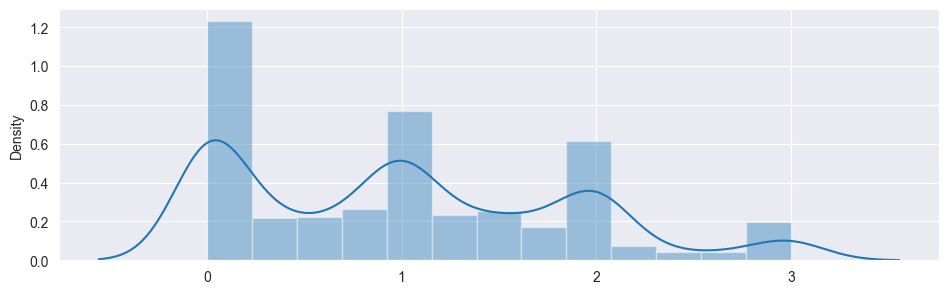

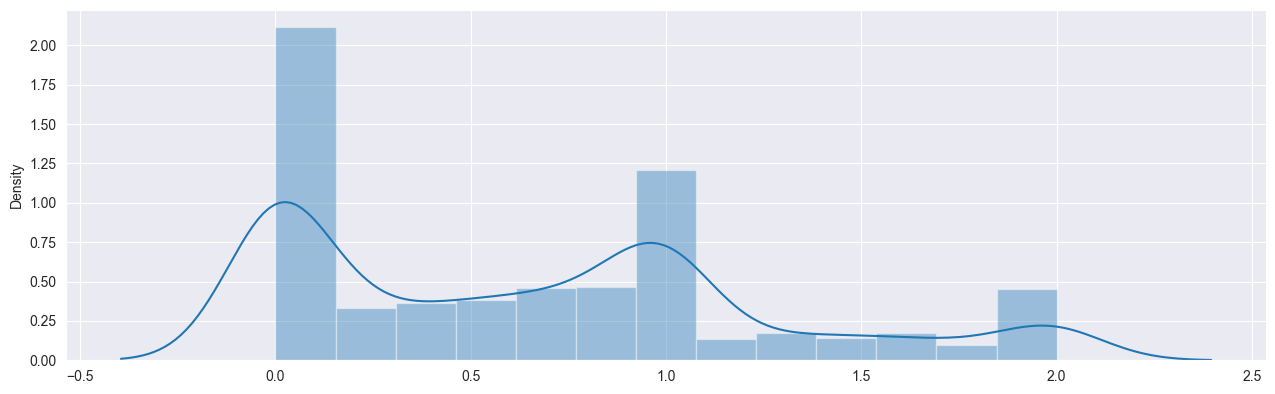

In [71]:
plt.suptitle("Distplots of Numerical Columns")

for i in range(0, len(num_columns)):
    plt.figure(figsize=(25,15))
    plt.subplot(4, 2, i+1)
    
    sns.distplot(x = df[num_columns[i]])
plt.tight_layout()
plt.show()

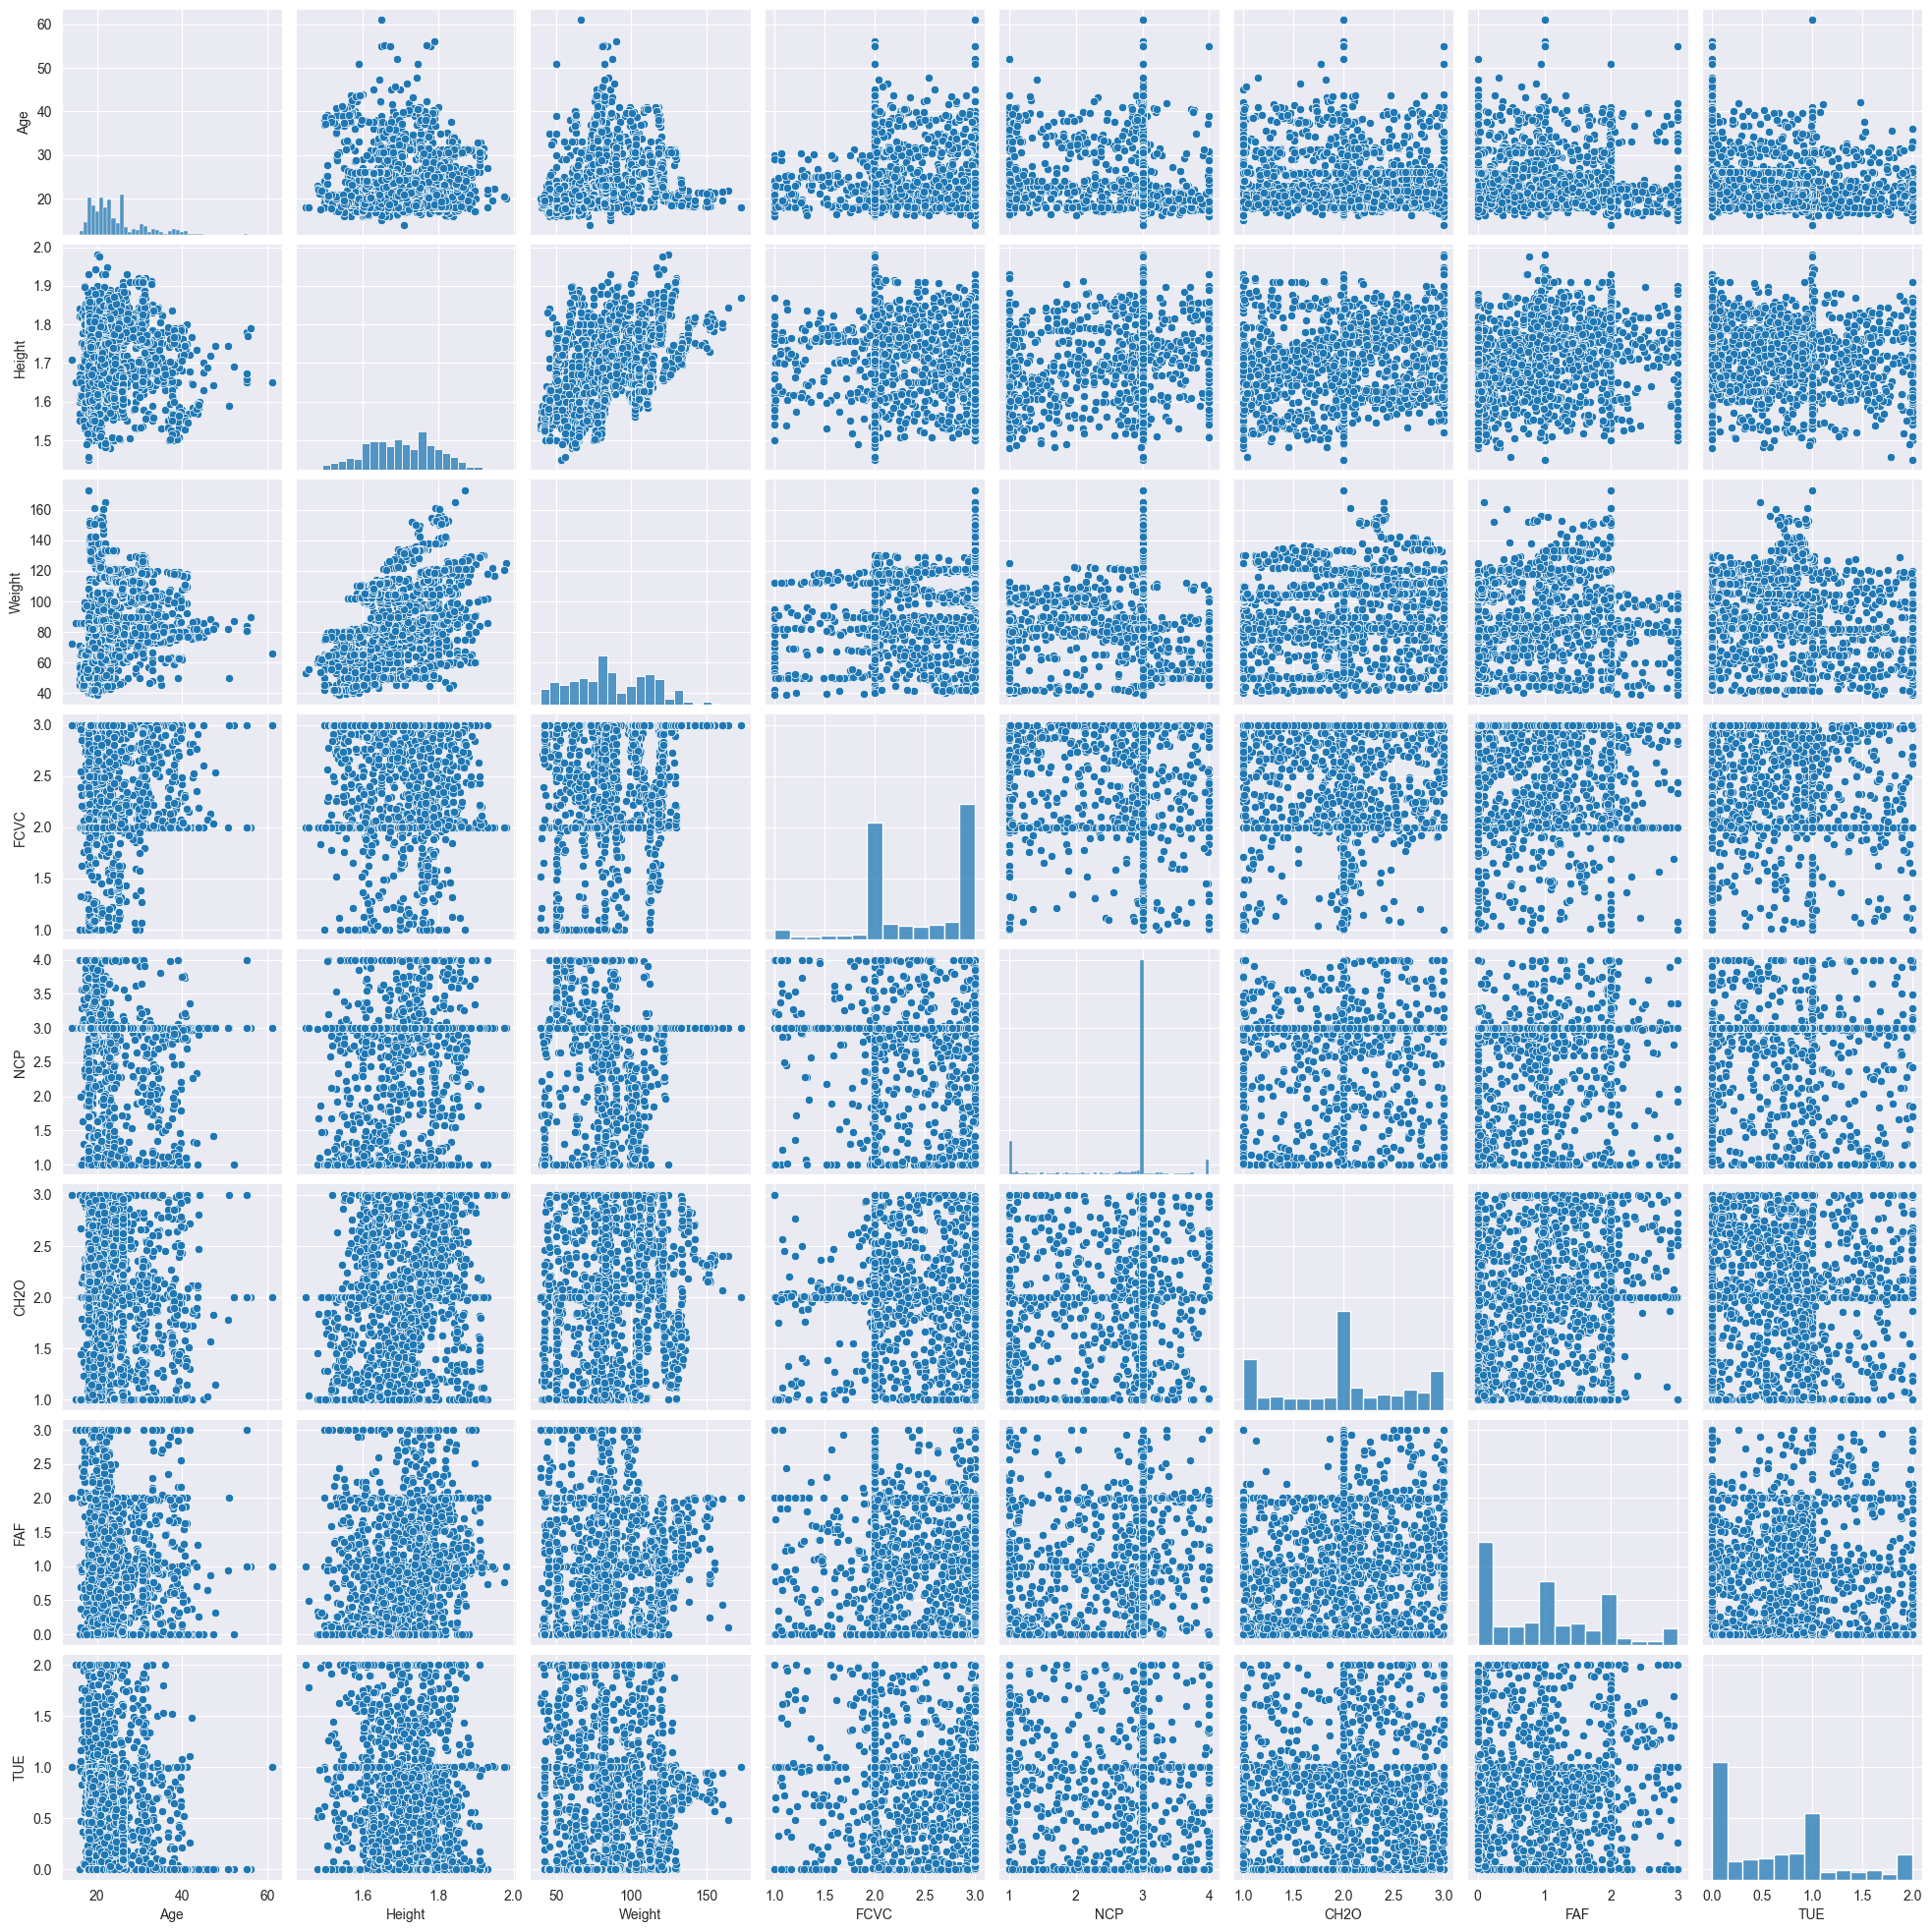

In [72]:
sns.pairplot(df)

<Axes: >

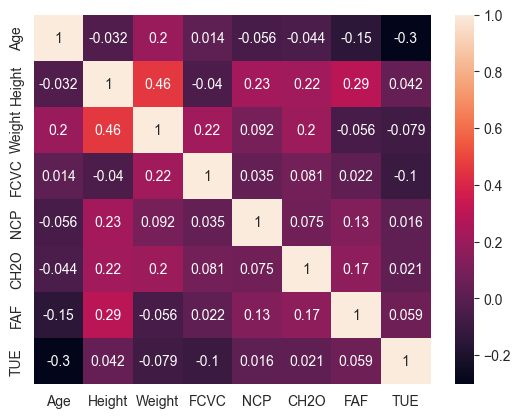

In [73]:
sns.heatmap(df[num_columns].corr(), annot = True)

### **Machine Learning**

- The target variable is NObesity. The attempt is is apply ML to find the best model for predicting NObesity. NObesity is a categorical variable that is a measure of a person weight ranging from under weight to very obese (Overweight Level II).

#### **Data prep for ML models: General**

- Some models may require additional treatment
- These steps will prep the data for the most viable models: Decision Trees, Random Forest, SVM, Nerual Network
- Some models may benifit from scaling so this will be evaluated as well

#### **Data Treatment**
- Copy cleaned data to new dataframe
- Create dummy variables out of categorical variables
- Split the data into 70/30 train & test datasets

In [16]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Convert object/text variables to category variables**

In [17]:

columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

for col in columns:
    df[col] = df[col].astype('category')

In [18]:
# function to interigate data after conversion
# provides min, max, unique counts
def variable_counts(columns, stage):

    if stage == 'pre':
        print("Pre Conversion to Integer")
    else:
        print("Post Conversion to Integer")

    for col in columns:    
        print("Variable:", col, "| Count Unique:",df[col].nunique(),"| Min: ", df[col].min(), "| Max: ",df[col].max())

In [19]:
# Convert float variables to integer to the nearest inter
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]

# pre conversion countss
variable_counts(columns, 'pre')

# convert to int / nearest int value
for col in columns:
    #round to nearest whole number
    df[col] = round(df[col]).astype('int')  
    
# post conversion counts
print("")
variable_counts(columns, 'post')

Pre Conversion to Integer
Variable: FCVC | Count Unique: 810 | Min:  1.0 | Max:  3.0
Variable: NCP | Count Unique: 635 | Min:  1.0 | Max:  4.0
Variable: CH2O | Count Unique: 1268 | Min:  1.0 | Max:  3.0
Variable: TUE | Count Unique: 1129 | Min:  0.0 | Max:  2.0
Variable: FAF | Count Unique: 1190 | Min:  0.0 | Max:  3.0

Post Conversion to Integer
Variable: FCVC | Count Unique: 3 | Min:  1 | Max:  3
Variable: NCP | Count Unique: 4 | Min:  1 | Max:  4
Variable: CH2O | Count Unique: 3 | Min:  1 | Max:  3
Variable: TUE | Count Unique: 3 | Min:  0 | Max:  2
Variable: FAF | Count Unique: 4 | Min:  0 | Max:  3


In [20]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [21]:
df.drop(['Height', 'Weight'], axis = 1, inplace = True)

In [22]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [23]:
df['Age'] = df['Age'].astype('int')

In [24]:
df['SMOKE'] = [1 if i == 'yes' else 0 for i in df['SMOKE']]

In [25]:
df['family_history_with_overweight'] = [1 if i == 'yes' else 0 for i in df['family_history_with_overweight']]

In [26]:
df['FAVC'] = [1 if i == 'yes' else 0 for i in df['FAVC']]

In [27]:
df['SCC'] = [1 if i == 'yes' else 0 for i in df['SCC']]

In [28]:
df['FAVC'] = [1 if i == 'yes' else 0 for i in df['FAVC']]

In [29]:
calc_map = {'no' : 0, 'Sometimes' : 1, 'Frequently':2, 'Always':3}

In [30]:
df['CALC'] = df['CALC'].map(calc_map)

In [31]:
mtrans_map = {'Public_Transportation' : 0, 'Walking' : 1, 'Automobile' : 2, 'Motorbike' : 3, 'Bike':4}

In [32]:
df['MTRANS'] = df['MTRANS'].map(mtrans_map)

In [34]:
df['Gender'] = [1 if i == 'Male' else 0 for i in  df['Gender']]

In [44]:
df['CAEC'].unique()

['Sometimes', 'Frequently', 'Always', 'no']
Categories (4, object): ['Always', 'Frequently', 'Sometimes', 'no']

In [45]:
caec_map = {'Sometimes':1, 'Frequently':2, 'Always':3, 'no':0}

In [46]:
df['CAEC'] = df['CAEC'].map(caec_map)

In [47]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1,0,2,3,1,0,2,0,0,1,0,0,Normal_Weight
1,0,21,1,0,3,3,1,1,3,1,3,0,1,0,Normal_Weight
2,1,23,1,0,2,3,1,0,2,0,2,1,2,0,Normal_Weight
3,1,27,0,0,3,3,1,0,2,0,2,0,2,1,Overweight_Level_I
4,1,22,0,0,2,1,1,0,2,0,0,0,1,0,Overweight_Level_II


**Split Datasetin Features and Tareget Variable**

*Features*

In [48]:
X = df.drop('NObeyesdad', axis = 1)

*Target Variable*

In [49]:
y = df['NObeyesdad']

**SPLIT THE DATASET INTO TRAIN & TEST DATASET**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [51]:
X_train.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
280,1,21,0,0,3,4,2,1,2,0,0,0,1,0
1197,1,33,1,0,2,2,1,0,2,0,1,0,0,2
102,0,21,0,0,2,4,2,0,2,1,2,0,1,2
2050,0,20,1,0,3,3,1,0,1,0,1,1,1,0
852,0,21,1,0,3,1,1,0,2,0,3,0,1,0


In [52]:
X_test.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1337,0,18,1,0,2,3,1,0,1,0,0,1,1,0
1763,1,31,1,0,2,3,1,1,2,0,1,0,1,0
389,0,16,1,0,1,1,1,0,2,0,0,0,0,0
595,1,17,1,0,3,4,1,0,2,0,2,0,0,2
1735,1,26,1,0,2,3,1,0,3,0,1,0,1,0


In [53]:
y_train.head()

280           Normal_Weight
1197    Overweight_Level_II
102           Normal_Weight
2050       Obesity_Type_III
852      Overweight_Level_I
Name: NObeyesdad, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

### **Machine Learning Models**

For this exercise we will take a look at

- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- K Nearest Neighbors
Cursory Look at the model results suggest that Random Forest will be our best initial model with an accuracy of 79%. However, many of the other models performance is not too far off.

The other interesting result is that all of the models classify Obesity_Type_III amazingly well with >= 98% accuracy across all models.

In [54]:
X_train.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
280,1,21,0,0,3,4,2,1,2,0,0,0,1,0
1197,1,33,1,0,2,2,1,0,2,0,1,0,0,2
102,0,21,0,0,2,4,2,0,2,1,2,0,1,2
2050,0,20,1,0,3,3,1,0,1,0,1,1,1,0
852,0,21,1,0,3,1,1,0,2,0,3,0,1,0


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)

# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred)*100,2)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled)*100,2)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled)*100,2)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("****************************************************************************************************")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("****************************************************************************************************")    
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("****************************************************************************************************")

In [63]:
run_models(X_train, y_train, X_test, y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 76.71
Accuracy w/Scaled Data (ss): 76.71
Accuracy w/Scaled Data (mm): 76.71

Classification Report (mm):
                      precision    recall  f1-score   support

Insufficient_Weight       0.76      0.87      0.81        87
      Normal_Weight       0.69      0.48      0.57        95
     Obesity_Type_I       0.68      0.72      0.70       105
    Obesity_Type_II       0.87      0.94      0.90        95
   Obesity_Type_III       0.95      0.99      0.97        91
 Overweight_Level_I       0.69      0.71      0.70        80
Overweight_Level_II       0.68      0.64      0.66        74

           accuracy                           0.77       627
          macro avg       0.76      0.77      0.76       627
       weighted avg       0.76      0.77      0.76       627

****************************************************************************************************
Decision Tree:
---------------

**Hyperparameter Tunning**

- Searching for better performance out of the models with Gridsearch

In [64]:
from sklearn.model_selection import GridSearchCV

#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,y_train)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred_scaled, target_names=target_names))
    

In [65]:
#the KNN model performs better on the unscaled data this function
# function for unscaled data
#model name, classifier, parameters
# function used to process models and parameters through gridsearch
def hyper_tune2(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train,y_train)
    y_pred = search.predict(X_test)
    print ("Accuracy Score = %3.2f" %(search.score(X_test,y_test)))
    print (search.best_params_)
    print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred, target_names=target_names))

**KNN**

In [66]:
# Number of neighbors
n_neighbors = [int(x) for x in range(4, 15)]
# weights
weights = ['uniform','distance']
# distance metric
metric = ['euclidean', 'manhattan', 'chebyshev']
# computation algorithm
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
# power paramter
p=[1,2]

parameters = { 'n_neighbors': n_neighbors,
              'weights':weights,
              'metric':metric,
              'p':p,
              'algorithm': algorithm              
               }

hyper_tune2('KNN', KNeighborsClassifier(), parameters)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits
Accuracy Score = 0.72
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.72      0.89      0.79        87
      Normal_Weight       0.60      0.22      0.32        95
     Obesity_Type_I       0.67      0.80      0.73       105
    Obesity_Type_II       0.77      0.94      0.84        95
   Obesity_Type_III       0.80      0.99      0.88        91
 Overweight_Level_I       0.71      0.55      0.62        80
Overweight_Level_II       0.64      0.59      0.62        74

           accuracy                           0.72       627
          macro avg       0.70      0.71      0.69       627
       weighted avg       0.70      0.72      0.69       627



**Random Forest**

In [67]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(10, 200,10)]
# Criterion
criterion = ['gini','entropy']
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 100, 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in range(2, 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in range(2, 5)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state
random_state = [1010]

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,
              #'random_state': random_state,
              #'max_features':max_features,
              #'min_samples_split':min_samples_split             
               }


hyper_tune('Random Forest',
           RandomForestClassifier(), parameters)

Fitting 5 folds for each of 380 candidates, totalling 1900 fits
Accuracy Score = 0.78
{'criterion': 'gini', 'max_depth': 60, 'n_estimators': 120}

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.77      0.89      0.82        87
      Normal_Weight       0.71      0.51      0.59        95
     Obesity_Type_I       0.71      0.76      0.73       105
    Obesity_Type_II       0.88      0.95      0.91        95
   Obesity_Type_III       0.97      0.97      0.97        91
 Overweight_Level_I       0.71      0.74      0.72        80
Overweight_Level_II       0.67      0.64      0.65        74

           accuracy                           0.78       627
          macro avg       0.77      0.78      0.77       627
       weighted avg       0.78      0.78      0.77       627



**Feature Importance w/ Random Forest**

In [68]:
# Create Decision Tree classifer object with optimized parameters
clf = RandomForestClassifier(criterion='entropy',
               n_estimators=52,
              max_depth = 51,              
              max_features='auto',
              min_samples_split=2,
              random_state=1010)

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

In [69]:
X.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

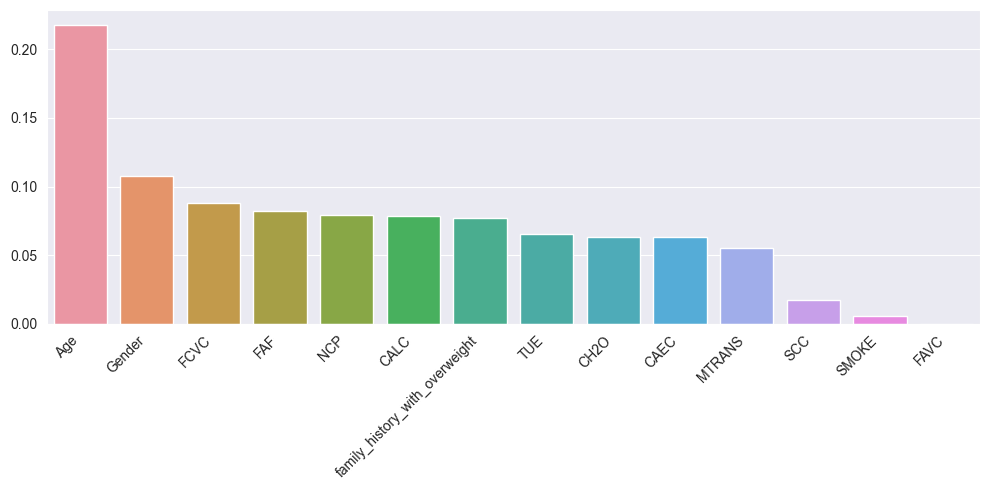


Top 10 Features:
Variable: Age                  Importance: 0.22
Variable: Gender               Importance: 0.11
Variable: FCVC                 Importance: 0.09
Variable: family_history_with_overweight Importance: 0.08
Variable: NCP                  Importance: 0.08
Variable: FAF                  Importance: 0.08
Variable: CALC                 Importance: 0.08
Variable: TUE                  Importance: 0.07
Variable: CAEC                 Importance: 0.06
Variable: CH2O                 Importance: 0.06

Bottom 10 Features:
Variable: FAVC                 Importance: 0.0
Variable: SMOKE                Importance: 0.01
Variable: SCC                  Importance: 0.02
Variable: CAEC                 Importance: 0.06
Variable: CH2O                 Importance: 0.06
Variable: MTRANS               Importance: 0.06
Variable: TUE                  Importance: 0.07
Variable: family_history_with_overweight Importance: 0.08
Variable: NCP                  Importance: 0.08
Variable: FAF                 

In [70]:
feature_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = plt.figure(figsize=(10, 5))

# Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xticks(rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

# create features list
features_list = X.columns
features_list = features_list.tolist()

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print("\nTop 10 Features:")
display_top = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]

# Sort the feature importances by least important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
# Print out the feature and importances 
print("\nBottom 10 Features:")
display_bottom = [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances[:10]]
